In [ ]:
!git clone https://github.com/lmcanavals/algorithmic_complexity.git 1>/dev/null

Cloning into 'algorithmic_complexity'...
remote: Enumerating objects: 268, done.
remote: Counting objects: 100% (268/268), done.
remote: Compressing objects: 100% (263/263), done.
remote: Total 268 (delta 150), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (268/268), 274.11 KiB | 4.49 MiB/s, done.
Resolving deltas: 100% (150/150), done.


In [ ]:
from algorithmic_complexity.aclib import graphstuff as gs
import pandas as pd
import numpy as np
import networkx as nx
import heapq as hq
import math

In [ ]:
url="https://raw.githubusercontent.com/lmcanavals/algorithmic_complexity/main/data/poblaciones.csv"
poblacionesDF = pd.read_csv(url)

In [ ]:
nomdepartamentos = poblacionesDF['DEPARTAMENTO'].unique()

In [ ]:
departamentos = dict()
for nom in nomdepartamentos:
  departamentos[nom] = poblacionesDF[poblacionesDF['DEPARTAMENTO'] == nom]

In [ ]:
#@title Provincia 
#@markdown Ingrese el departamento   
#@markdown
#@markdown Ingrese la provincia  
#@markdown
#@markdown Ingrese el distrito  
#@markdown
#@markdown Ingrese el centro poblado  

no_type_checking = ''
nom_departamento = 'AMAZONAS'
nom_provincia = 'UTCUBAMBA'
nom_distrito = 'CUMBA'
nom_centro_pob = 'CHALA'

In [ ]:
nomprovincias = departamentos[nom_departamento]['PROVINCIA'].unique()

In [ ]:
provincias = dict()
for nom in nomprovincias:
  provincias[nom] = departamentos[nom_departamento][departamentos[nom_departamento]['PROVINCIA'] == nom]

In [ ]:
nomdistritos = provincias[nom_provincia]['DISTRITO'].unique()

In [ ]:
distritos = dict()
for nom in nomdistritos:
  distritos[nom] = provincias[nom_provincia][provincias[nom_provincia]['DISTRITO'] == nom]

In [ ]:
def haversine(cp1, cp2):
  la1, lo1 = float(cp1['LATITUD']), float(cp1['LONGITUD'])
  la2, lo2 = float(cp2['LATITUD']), float(cp2['LONGITUD'])
  
  lo1, la1, lo2, la2 = map(math.radians, [lo1, la1, lo2, la2])
  dlo = lo2 - lo1
  dla = la2 - la1
  a = math.sin(dla/2)**2 + math.cos(la1) * math.cos(la2) * math.sin(dlo/2)**2
  c = 2 * math.asin(math.sqrt(a))
  r = 6371

  return round(c * r, 2)

In [ ]:
distrito = distritos[nom_distrito]

In [ ]:
G = nx.Graph()
col = 'CENTRO POBLADO'
for i, cp1 in distrito.iterrows():
  G.add_node(i, label=cp1[col])

for i, cp1 in distrito.iterrows():
  for j, cp2 in distrito.iterrows():
    if cp1[col] != cp2[col]:
      G.add_edge(i, j, weight=haversine(cp1, cp2))

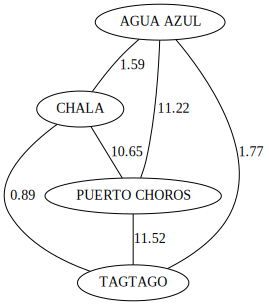

In [ ]:
gs.nx2gv(G, weighted=True, params={'size':'10'}, nodeinfo=True)

Aplicando Algoritmo 2

In [ ]:
G1 = nx.Graph()
def _dijkstra1(G, s, pobls, first):
  pob = -1
  largo=10000
  for v in G.neighbors(s):
    if G.edges[s, v]['weight'] < largo and v in pobls:
      #Guardando ruta y cent. pobl. vecino más cercano al nodo
      largo, pob = G.edges[s, v]['weight'], v
          
  #Quitar el cent. pobl. obtenido
  pobls.remove(s)
  G1.add_node(s, label=G.nodes[s]['label'])

  if pobls:
    G1.add_edge(s, pob, weight=largo)
    _dijkstra1(G, pob, pobls, first)
  else:
    G1.add_edge(s, first, weight=G.edges[s, first]['weight'])


def dijkstra1(G, s):
  pobls = []
  first = -1
  for i, cp1 in distrito.iterrows():
    #Comparar el nombre del centro poblado con su nodo respectivo
    if cp1[col] == s:
      #Guardando el primer nodo
      first=i
      break

  #Añadiendo valores a la cola para indicar saber si se visitó un nodo o no
  for u in G.nodes:
    pobls.append(u)

  _dijkstra1(G, first, pobls, first)

15


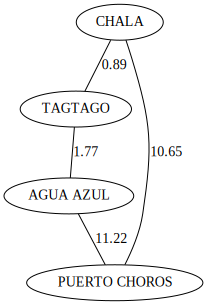

In [ ]:
dijkstra1(G, nom_centro_pob)
gs.nx2gv(G1, weighted=True, params={'size':'5'}, nodeinfo=True)

In [ ]:
G1 = nx.Graph()  
q_poblaciones = []

def dijkstra(G, s):
  for u in G.nodes:
    q_poblaciones.append(u)

  first = s
  largo = 10000
  poblacion = ''

  while q_poblaciones:
    for v in G.neighbors(s):
      if G.edges[s, v]['weight'] < largo and v in q_poblaciones:
        largo, poblacion = G.edges[s, v]['weight'], v
          
    q_poblaciones.remove(s)
    if not q_poblaciones:
      G1.add_edge(s, first, weight=G.edges[s, first]['weight'])
      break
    
    G1.add_edge(s, poblacion, weight=largo)
    s = poblacion
    poblacion = ''
    largo = 10000



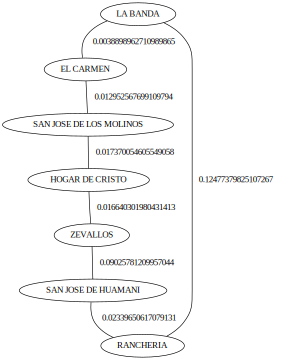

In [ ]:
dijkstra(G, nom_centro_pob)
gs.nx2gv(G1, weighted=True, params={'size':'5'})